# Trees in Camden
Use this notebook to complete your analysis.
Enter code and comments after the TODOs.

There are some code cells completed for you.  These are highlighted with a <font style="color:crimson;background-color:lemonchiffon">TODO</font> comment.  You can use these to guide the subsequent tasks.  Other cells require you to read documentation or search for answers.  The markdown comments give you links to some useful documentation and articles.  Read the documentation, look at the examples provided in the documentation and then try to apply them to your data.

Remember that you can find information on the pandas functions on the Pandas website https://pandas.pydata.org/pandas-docs/stable/reference/frame.html or directly in the notebook by puttin a ? before or after the function name. for instance: `?df.head()` or `df['Maturity'].value_counts()?`

## Imports
Import the libraries we need to perform the analysis.

In [10]:
import pandas as pd

## Task 2: Load Data and Perform Initial Exploration
Load the data from the supplied data files.  The files are in different **file formats**, but Pandas can handle this.

You should read the data in using the appropriate function:

- [pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
- [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [pandas.read_json](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_json.html)

You can then inspect the first few rows of the loaded dataframe:

[pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

You can get the number of rows and columns:

[pandas.DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

You can get the list of column names:

[pandas.DataFrame.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)

And you can list the data types of the columns:

[pandas.DataFrames.dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)

I've done the first one (loading `"camden_trees.xlsx"`) for you.  Please load `"camden_trees_environmental.csv"` and `"tree_common_names.json"` and analyse them in the same way.


### 2.1 Trees
The file `"camden_trees.xlsx"` is an Excel file, so we use the `read_excel()` function.

In [11]:
# Create a Pandas dataframe called trees that contains the contents of the Excel file
trees = pd.read_excel("camden_trees.xlsx")

We can now inspect the first few rows using `head()`.  By default, `head()` displays the first 5 rows.

In [12]:
# Display the first few rows
trees.head(25)

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"
5,00007523,1.0,Westcroft Estate 1,Housing,Betula pendula,2018-08-06,2021/2022,9.0,7.0,29.0,NaN,NaN,524253,185982,-0.208975,51.559049,"(51.559049, -0.208975)"
6,00041657,1.0,Westcroft Estate 4,Housing,Betula pendula,2018-08-06,2021/2022,4.0,1.0,5.0,NaN,NaN,524253,185823,-0.209029,51.557613,"(51.557613, -0.209029)"
7,00060359,1.0,TOTTENHAM COURT ROAD,Highways,Vacant Tree Pit (planned: Acer campestre),NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
8,00058880,1.0,YORK WAY,Highways,Corylus colurna,2019-10-23,2022/2023,0.0,0.0,0.0,NaN,NaN,530336,183342,-0.122259,51.533953,"(51.533953, -0.122259)"
9,00057919,1.0,Weedington Road Estate 2,Housing,Mespilus germanica,NaT,NaN,2.0,1.5,4.0,E05000134,Gospel Oak,528174,185268,-0.152705,51.551755,"(51.551755, -0.152705)"


It's good to understand the size of the dataset we are dealing with.  The `shape` property does this for us.

In [13]:
# Get the number of rows and columns
trees.shape

(23444, 17)

If there are lots of columns we can't always see all of them in the `head()` list above.  We can use the `columns` property to get a full list:

In [14]:
# Get a list of all the columns in the dataframe
trees.columns

Index(['Identifier', 'Number Of Trees', 'Site Name', 'Contract Area',
       'Scientific Name', 'Inspection Date', 'Inspection Due Date',
       'Height In Metres', 'Spread In Metres',
       'Diameter In Centimetres At Breast Height', 'Ward Code', 'Ward Name',
       'Easting', 'Northing', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In order to process the data properly, we should understand the data type for each column.  Pandas attempts to work this out for us, but sometimes we need to give it a bit of a hand.  We can use the `dtypes` property to list the data types.  Note that `object` is Pandas way of saying `string`, i.e. a text data type.

In [15]:
# List the data types of each column
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                              int64
Northing                                             int64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

### 2.2 Environmental
The file `"camden_trees_environmental.csv"` is a csv file.  Use the appropriate function to load it into a Pandas DataFrame.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [16]:
# Create a Pandas dataframe called environmental that contains the contents of the csv file
environmental = pd.read_csv("camden_trees_environmental.csv")

In [17]:
# Display the first few rows
environmental.head()

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
0,00055125,Juvenile,Good,No,NaN,115.07,1.6,0.5,5.7
1,00059429,Middle aged,Fair,No,NaN,7518.08,NaN,NaN,NaN
2,00018254,Mature,Fair,No,NaN,20419.63,426.4,8.8,215.2
3,00027155,Mature,Fair,No,NaN,21447.74,448.3,9.6,379.1
4,00041326,Juvenile,Good,No,NaN,524.30,9.9,1.4,12.8


In [18]:
# Get the number of rows and columns
environmental.shape

(23415, 9)

In [19]:
# Get a list of all the columns in the dataframe
environmental.columns

Index(['Identifier', 'Maturity', 'Physiological Condition',
       'Tree Set To Be Removed', 'Removal Reason',
       'Capital Asset Value For Amenity Trees', 'Carbon Storage In Kilograms',
       'Gross Carbon Sequestration Per Year In Kilograms',
       'Pollution Removal Per Year In Grams'],
      dtype='object')

In [20]:
# List the data types of each column
environmental.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

<hr/>

### 2.3 Common and Scientific Names
The file `"tree_common_names.json"` is a json file.  Use the appropriate function to load it into a Pandas DataFrame.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [21]:
# Create a Pandas dataframe called names that contains the contents of the json file
names=pd.read_json("tree_common_names.json")

In [22]:
# Display the first few rows
names.head()

,Scientific Name,Common Name
0,Carpinus betulus Lucas,Hornbeam - European
1,Prunus 'Pandora',Cherry - Ornamental
2,Tilia unidentified species,Lime
3,Rosa unidentified species,None
4,Cedrus libani,Cedar of Lebanon


In [23]:
# Get the number of rows and columns
names.shape

(589, 2)

In [24]:
# Get a list of all the columns in the dataframe
names.columns

Index(['Scientific Name', 'Common Name'], dtype='object')

In [25]:
# List the data types of each column
names.dtypes

Scientific Name    object
Common Name        object
dtype: object

<hr/>

### 2.4 Review
At the end of this task you should have a good basic understanding of the contents and overall shape of the different data files.  If you don't, do back and review the outputs above.

## Task 3: Further Inspect the Datasets
The initial inspection gave you a very high-level understanding of the data.  We will now drill a bit deeper and try to understand the data column-by-column.

For columns with a string data type (`object` in Pandas) we have **qualitative** data.  It would be good to know how many *different* values we have in the column, what those values are and the *count* how many of each different value we have.  This will help us understand if the qualitative variable is **binary**, **nominal** or **ordinal**.

For columns with a numeric data type (`int` or `float`) we have **quantitative** data.  Usually integer type variables can the thought of as **discrete** and float type variables can be thought of as **continuous**.  It would be good to know some summary descriptive statistics for these columns.   

If you are unsure of what these different data classifications mean, read this:

[Types of Variables](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6051886-discover-the-four-variable-types)

You can get the list of values and counts for a column using this function:

[pandas.Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

You can get the descriptive statistics for a DataFrame using this function:

[pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

Note that Pandas may treat integer columns as floats if there are null values in the columns.  So if you see a float data type it might be worth checking the actual values to confirm if it really is a float or if it really is an int with nulls.  You can check the actual values with:

[pandas.Series.unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)



### 3.1 Further Inspect the Trees Dataset
Let's start with the trees dataset.


#### 3.1.a Counts of Values for String Types Columns
Go through each column that is a string (object) type and count the number of rows for each value in the column.  After each one, classify the data as binary, nominal or ordinal using a markdown comment.

I've done the first one for you.


**Site Name**

In [26]:
# List of values in Site Name column and their counts
trees["Site Name"].value_counts()

WATERLOW PARK (LS)                         920
Alexandra & Ainsworth Estate               289
Belsize nature reserve, Russell Nursery    278
Holly Lodge Estate                         272
LINCOLN'S INN FIELDS, GARDENS (LS)         193
                                          ... 
GOLDINGTON CRESCENT                          1
ALLCROFT ROAD                                1
WOBURN WALK, LAND BEHIND 4-18                1
KILBURN PRIORY                               1
GOODGE PLACE                                 1
Name: Site Name, Length: 1135, dtype: int64

Site Name is **qualitative nominal**.

Now do the same on the other string columns.  Use `value_counts()` and then classify as binary, ordered or unordered using a markdown comment.  As you do each one, stop and look at the values and counts and think about how the data in the column might be useful for supporting the council's initiatives.  Don't just treat this as a mechanical copy/paste task. The objective is, after all, to get really intimate with the data!

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column as in the above example.  Add as many cells as you need.
    </font></div>

In [27]:
trees['Identifier'].value_counts()

00000999    2
00060087    2
00022744    2
00032549    2
00022674    2
           ..
00046158    1
00058373    1
00059181    1
00002274    1
00013369    1
Name: Identifier, Length: 23438, dtype: int64

Wrong Datatype

In [28]:
trees['Contract Area'].value_counts()

Highways              10062
Housing                7500
Parks                  4330
Education              1288
Corporate Landlord      264
Name: Contract Area, dtype: int64



Contract Aread is **qualitative nominal.**


In [29]:
trees['Scientific Name'].value_counts()

Platanus x hispanica                                 3340
Tilia europaea                                       1468
Acer pseudoplatanus                                   941
Betula pendula                                        765
Fraxinus excelsior                                    754
                                                     ... 
Vacant Tree Pit (planned: Populus tremula)              1
Liriodendron fastigiata                                 1
Sequoia sempervirens                                    1
Sorbus x hybrida                                        1
Vacant Tree Pit (planned: Acer rubrum 'Amstrong')       1
Name: Scientific Name, Length: 543, dtype: int64

Scientific Name is **qualitative nominal.**

In [30]:
trees['Ward Code'].value_counts()

E05000137    2799
E05000143    1832
E05000134    1541
E05000140    1540
E05000139    1463
E05000136    1424
E05000135    1340
E05000138    1293
E05000132    1284
E05000131    1231
E05000133    1229
E05000129    1008
E05000142     989
E05000144     978
E05000130     899
E05000145     853
E05000141     824
E05000128     691
Name: Ward Code, dtype: int64

Ward Code is **qualitative nominal.**

In [31]:
trees['Ward Name'].value_counts()

Highgate                          2799
St Pancras and Somers Town        1832
Gospel Oak                        1541
Kilburn                           1540
Kentish Town                      1463
Haverstock                        1424
Hampstead Town                    1340
Holborn and Covent Garden         1293
Fortune Green                     1284
Cantelowes                        1231
Frognal and Fitzjohns             1229
Bloomsbury                        1008
Regent's Park                      989
Swiss Cottage                      978
Camden Town with Primrose Hill     899
West Hampstead                     853
King's Cross                       824
Belsize                            691
Name: Ward Name, dtype: int64

Ward name **is qualitative nominal.**

In [32]:
trees['Location'].value_counts()

(51.556205, -0.173776)    3
(51.553475, -0.152668)    3
(51.548133, -0.144922)    2
(51.544482, -0.144465)    2
(51.55468, -0.164744)     2
                         ..
(51.525312, -0.128846)    1
(51.540297, -0.181512)    1
(51.556013, -0.211326)    1
(51.55969, -0.182457)     1
(51.552397, -0.173397)    1
Name: Location, Length: 23262, dtype: int64

Wrong Datatype

<hr/>

#### 3.1.b Descriptive Stats for Numeric Type Columns
Use the `describe()` function to get the descriptive stats for the numeric columns.

For each column, classify the column as discrete or continuous (use the data type to guide you, but check any floats to confirm whether they are really floats or just ints with null values.  Use `pandas.Series.unique()` to check this).


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [33]:
# Get the descriptive stats for the numeric columns
trees['Number Of Trees'].describe()

count    23422.000000
mean         1.100034
std          1.288041
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         67.000000
Name: Number Of Trees, dtype: float64

In [34]:
# Remind ourselves of the data types
number_of_trees_type = 'Discrete' if trees['Number Of Trees'].dtype == 'int64' else 'Continuous'
print("Column: Number Of Trees")
print("Type:", number_of_trees_type)

Column: Number Of Trees
Type: Continuous


In [35]:
trees['Height In Metres'].describe()

count    23006.000000
mean        10.307029
std          6.325293
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max        127.000000
Name: Height In Metres, dtype: float64

In [36]:
height_type = 'Continuous' if trees['Height In Metres'].dtype == 'float64' else 'Discrete'
print("Column: Height In Metres")
print("Type:", height_type)

Column: Height In Metres
Type: Continuous


In [37]:
trees['Spread In Metres'].describe()

count    23006.000000
mean         5.997612
std          4.132379
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         88.000000
Name: Spread In Metres, dtype: float64

In [38]:
spread_type = 'Continuous' if trees['Spread In Metres'].dtype == 'float64' and not trees['Spread In Metres'].isnull().any() else 'Discrete'
print("Column: Spread In Metres")
print("Type:", spread_type)

Column: Spread In Metres
Type: Discrete


In [39]:
trees['Diameter In Centimetres At Breast Height'].describe()

count    23005.000000
mean        32.595262
std         26.149994
min          0.000000
25%         12.000000
50%         27.000000
75%         46.000000
max        228.000000
Name: Diameter In Centimetres At Breast Height, dtype: float64

In [40]:
diameter_type = 'Continuous' if trees['Diameter In Centimetres At Breast Height'].dtype == 'float64' and not trees['Diameter In Centimetres At Breast Height'].isnull().any() else 'Discrete'
print("Column: Diameter In Centimetres At Breast Height")
print("Type:", diameter_type)

Column: Diameter In Centimetres At Breast Height
Type: Discrete


In [41]:
trees['Easting'].describe()

count     23444.000000
mean     526762.518171
std       25835.857212
min           0.000000
25%      526583.750000
50%      528456.500000
75%      529369.000000
max      531514.000000
Name: Easting, dtype: float64

In [42]:
print("Column: Easting")
print("Type: Discrete")

Column: Easting
Type: Discrete


In [43]:
trees['Northing'].describe()

count     23444.000000
mean     184085.188662
std        9121.059755
min           0.000000
25%      183665.000000
50%      184690.000000
75%      185481.000000
max      196188.000000
Name: Northing, dtype: float64

In [44]:
print("Column: Northing")
print("Type: Discrete")

Column: Northing
Type: Discrete


In [45]:
trees['Longitude'].describe()

count    23388.000000
mean        -0.155145
std          0.025058
min         -0.261719
25%         -0.175734
50%         -0.148478
75%         -0.135978
max         -0.105858
Name: Longitude, dtype: float64

In [46]:
longitude_type = 'Continuous' if trees['Longitude'].dtype == 'float64' and not trees['Longitude'].isnull().any() else 'Discrete'
print("Column: Longitude")
print("Type:", longitude_type)

Column: Longitude
Type: Discrete


In [47]:
trees['Latitude'].describe()

count    23388.000000
mean        51.545115
std          0.013067
min         51.512858
25%         51.537472
50%         51.546669
75%         51.554032
max         51.650843
Name: Latitude, dtype: float64

In [48]:
latitude_type = 'Continuous' if trees['Latitude'].dtype == 'float64' and not trees['Latitude'].isnull().any() else 'Discrete'
print("Column: Latitude")
print("Type:", latitude_type)

Column: Latitude
Type: Discrete


<hr/>

Find out if floats are really floats or ints with nulls.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column.   Add as many cells as you need.
    </font></div>

In [49]:
float_columns = ['Number Of Trees', 'Height In Metres', 'Spread In Metres', 'Diameter In Centimetres At Breast Height', 'Longitude', 'Latitude']  # List of float column names
for col in float_columns:
    unique_values = trees[col].dropna().unique()
    if all(value.is_integer() for value in unique_values):
        print(f"Column '{col}' is integers with nulls")
    else:
        print(f"Column '{col}' is truly a float")

Column 'Number Of Trees' is integers with nulls
Column 'Height In Metres' is truly a float
Column 'Spread In Metres' is truly a float
Column 'Diameter In Centimetres At Breast Height' is truly a float
Column 'Longitude' is truly a float
Column 'Latitude' is truly a float



<hr/>

Classify the columns as discrete or continuous.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter markdown below.
</div>


'Identifier': 'Discrete'

'Number Of Trees': 'Continuous'

'Height In Metres': 'Continuous'

'Spread In Metres': 'Discrete'

'Diameter In Centimetres At Breast Height': 'Discrete'

'Easting': 'Discrete'

'Northing': 'Discrete'

'Longitude': 'Discrete'

'Latitude': 'Discrete'

<hr/>

### 3.2 Further Inspect the Environmental Dataset
Now repeat the above for the environmental dataset.

#### 3.2.a Counts of Values for String Type Columns
For each string column in the environmental dataset show the counts of the unique values.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
    TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column.  Add as many cells as you need.
</font></div>

In [50]:
identifier_counts = environmental['Identifier'].value_counts()
print("Counts of unique values for column 'Identifier':")
print(identifier_counts)

Counts of unique values for column 'Identifier':
00055125    1
00001681    1
00008539    1
00019552    1
00032062    1
           ..
00013724    1
00005978    1
00017336    1
00014229    1
00001786    1
Name: Identifier, Length: 23415, dtype: int64


In [51]:
numeric_columns = environmental.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    print(f"Descriptive statistics for column '{col}':")
    print(environmental[col].describe())
    print()

Descriptive statistics for column 'Capital Asset Value For Amenity Trees':
count     22982.000000
mean      14056.393047
std       24803.806595
min           0.000000
25%        1035.650000
50%        5443.660000
75%       16781.420000
max      504725.720000
Name: Capital Asset Value For Amenity Trees, dtype: float64

Descriptive statistics for column 'Carbon Storage In Kilograms':
count    20555.000000
mean       467.465454
std        844.926555
min          0.500000
25%         24.800000
50%        163.900000
75%        497.300000
max       6000.000000
Name: Carbon Storage In Kilograms, dtype: float64

Descriptive statistics for column 'Gross Carbon Sequestration Per Year In Kilograms':
count    20555.000000
mean         8.675057
std          8.681446
min          0.000000
25%          2.200000
50%          6.100000
75%         11.700000
max         53.800000
Name: Gross Carbon Sequestration Per Year In Kilograms, dtype: float64

Descriptive statistics for column 'Pollution Removal P

In [97]:
# Column: Identifier
print(environmental['Identifier'].value_counts())
print("Column: Identifier")

# Classify the data (Assuming Identifier is a unique identifier, it's nominal)
print("Type: Nominal")
print()

# Column: Maturity
print(environmental['Maturity'].value_counts())
print("Column: Maturity")

# Classify the data (Assuming Maturity has ordered values, it's ordinal)
print("Type: Ordinal")
print()

# Column: Physiological Condition
print(environmental['Physiological Condition'].value_counts())
print("Column: Physiological Condition")

# Classify the data (Assuming Physiological Condition has unordered values, it's nominal)
print("Type: Nominal")
print()

# Column: Tree Set To Be Removed
print(environmental['Tree Set To Be Removed'].value_counts())
print("Column: Tree Set To Be Removed")

# Classify the data (Assuming Tree Set To Be Removed has binary values, it's binary)
print("Type: Binary")
print()

# Column: Removal Reason
print(environmental['Removal Reason'].value_counts())
print("Column: Removal Reason")

# Classify the data (Assuming Removal Reason has unordered values, it's nominal)
print("Type: Nominal")
print()

# Column: Capital Asset Value For Amenity Trees
print(environmental['Capital Asset Value For Amenity Trees'].describe())
print("Column: Capital Asset Value For Amenity Trees")

# Classify the data (Assuming Capital Asset Value For Amenity Trees is a continuous variable)
print("Type: Continuous")
print()

# Column: Carbon Storage In Kilograms
print(environmental['Carbon Storage In Kilograms'].describe())
print("Column: Carbon Storage In Kilograms")

# Classify the data (Assuming Carbon Storage In Kilograms is a continuous variable)
print("Type: Continuous")
print()

# Column: Gross Carbon Sequestration Per Year In Kilograms
print(environmental['Gross Carbon Sequestration Per Year In Kilograms'].describe())
print("Column: Gross Carbon Sequestration Per Year In Kilograms")

# Classify the data (Assuming Gross Carbon Sequestration Per Year In Kilograms is a continuous variable)
print("Type: Continuous")
print()

# Column: Pollution Removal Per Year In Grams
print(environmental['Pollution Removal Per Year In Grams'].describe())
print("Column: Pollution Removal Per Year In Grams")

# Classify the data (Assuming Pollution Removal Per Year In Grams is a continuous variable)
print("Type: Continuous")
print()

00055125    1
00001681    1
00008539    1
00019552    1
00032062    1
           ..
00013724    1
00005978    1
00017336    1
00014229    1
00001786    1
Name: Identifier, Length: 23415, dtype: int64
Column: Identifier
Type: Nominal

Mature            10225
Middle aged        7779
Juvenile           4393
Not Applicable      377
Over Mature         191
Veteran              41
Name: Maturity, dtype: int64
Column: Maturity
Type: Ordinal

Good              12910
Fair               9183
Poor                357
Not applicable      249
Dead                236
Excellent             8
Name: Physiological Condition, dtype: int64
Column: Physiological Condition
Type: Nominal

No     23331
Yes       84
Name: Tree Set To Be Removed, dtype: int64
Column: Tree Set To Be Removed
Type: Binary

Dead, dying                    30
Basal decay                    17
Trunk decay                    10
Tree defect                     5
Crown die-back                  5
Dog damage                      3
Unsuitab

<hr/>

#### 3.2.b Descriptive Stats for Numeric Type Columns
For each numeric column in the environmental dataset show the descriptive stats

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [98]:
# Get the descriptive stats for all numeric columns
numeric_columns = environmental.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    print(f"Descriptive statistics for column '{col}':")
    print(environmental[col].describe())
    print()

Descriptive statistics for column 'Capital Asset Value For Amenity Trees':
count     22982.000000
mean      14056.393047
std       24803.806595
min           0.000000
25%        1035.650000
50%        5443.660000
75%       16781.420000
max      504725.720000
Name: Capital Asset Value For Amenity Trees, dtype: float64

Descriptive statistics for column 'Carbon Storage In Kilograms':
count    20555.000000
mean       467.465454
std        844.926555
min          0.500000
25%         24.800000
50%        163.900000
75%        497.300000
max       6000.000000
Name: Carbon Storage In Kilograms, dtype: float64

Descriptive statistics for column 'Gross Carbon Sequestration Per Year In Kilograms':
count    20555.000000
mean         8.675057
std          8.681446
min          0.000000
25%          2.200000
50%          6.100000
75%         11.700000
max         53.800000
Name: Gross Carbon Sequestration Per Year In Kilograms, dtype: float64

Descriptive statistics for column 'Pollution Removal P

In [99]:
# Remind ourselves of the data types
print(environmental.dtypes)


Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object


<hr/>

Find out if floats are really floats or ints with nulls.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column.   Add as many cells as you need.
    </font></div>

In [100]:
float_values = environmental['Capital Asset Value For Amenity Trees'].dropna()
if all(value.is_integer() for value in float_values):
    print("'Capital Asset Value For Amenity Trees' is actually an integer with nulls.")
else:
    print("'Capital Asset Value For Amenity Trees' is a float column.")

'Capital Asset Value For Amenity Trees' is a float column.


In [101]:
float_values = environmental['Carbon Storage In Kilograms'].dropna()
if all(value.is_integer() for value in float_values):
    print("'Carbon Storage In Kilograms' is actually an integer with nulls.")
else:
    print("'Carbon Storage In Kilograms' is a float column.")

'Carbon Storage In Kilograms' is a float column.


In [102]:
float_values = environmental['Gross Carbon Sequestration Per Year In Kilograms'].dropna()
if all(value.is_integer() for value in float_values):
    print("'Gross Carbon Sequestration Per Year In Kilograms' is actually an integer with nulls.")
else:
    print("'Gross Carbon Sequestration Per Year In Kilograms' is a float column.")

'Gross Carbon Sequestration Per Year In Kilograms' is a float column.


In [103]:
float_values = environmental['Pollution Removal Per Year In Grams'].dropna()
if all(value.is_integer() for value in float_values):
    print("'Pollution Removal Per Year In Grams' is actually an integer with nulls.")
else:
    print("'Pollution Removal Per Year In Grams' is a float column.")

'Pollution Removal Per Year In Grams' is a float column.


<hr/>


Classify the columns as discrete or continuous.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter markdown below.
    </font></div>


In [104]:
# Assuming 'environmental' is your DataFrame containing the data
# Replace 'environmental' with the actual name of your DataFrame

# Classify each column as discrete or continuous
column_types = {}

# Classify 'Identifier' column as discrete since it contains unique identifiers
column_types['Identifier'] = 'Discrete'

# Classify 'Maturity' column as ordinal since it likely represents categorical maturity levels
column_types['Maturity'] = 'Ordinal'

# Classify 'Physiological Condition' column as nominal since it likely represents categorical physiological conditions
column_types['Physiological Condition'] = 'Nominal'

# Classify 'Tree Set To Be Removed' column as binary since it likely represents a binary decision (yes/no)
column_types['Tree Set To Be Removed'] = 'Binary'

# Classify 'Removal Reason' column as nominal since it likely represents categorical reasons for removal
column_types['Removal Reason'] = 'Nominal'

# Classify float columns
# For float columns, we'll classify them as continuous
float_columns = ['Capital Asset Value For Amenity Trees',
                 'Carbon Storage In Kilograms',
                 'Gross Carbon Sequestration Per Year In Kilograms',
                 'Pollution Removal Per Year In Grams']

for col in float_columns:
    column_types[col] = 'Continuous'

# Print column types
for col, col_type in column_types.items():
    print(f"{col}: {col_type}")

Identifier: Discrete
Maturity: Ordinal
Physiological Condition: Nominal
Tree Set To Be Removed: Binary
Removal Reason: Nominal
Capital Asset Value For Amenity Trees: Continuous
Carbon Storage In Kilograms: Continuous
Gross Carbon Sequestration Per Year In Kilograms: Continuous
Pollution Removal Per Year In Grams: Continuous


<hr/>

### 3.3 Further Inspect the Common Names Dataset
Now repeat the above for the common names dataset.

#### 3.3.a (Names) Counts of Values for String Type Columns
For each string column in the common names dataset show the counts of the unique values.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
<font color="crimson">TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column.  Add as many cells as you need.</font>
    </font></div>


In [106]:
string_columns = names.select_dtypes(include=['object']).columns

# Iterate over each string column
for col in string_columns:
    print(f"Value counts for column '{col}':")
    print(names[col].value_counts())
    print()

Value counts for column 'Scientific Name':
Cupressocyparis leylandii                             2
Larix decidua                                         2
Salix fragilis                                        2
Alnus cordata                                         2
Populus nigra                                         2
                                                     ..
Pyrus salicifolia 'Pendula'                           1
Chamaecyparis lawsoniana 'unid                        1
Platanus x hispanica Tremonia                         1
Vacant Tree Pit (planned: Gymnocladus dioicus)        1
Vacant Tree Pit (planned: Liquidambar styraciflua)    1
Name: Scientific Name, Length: 560, dtype: int64

Value counts for column 'Common Name':
Cherry                         12
Rowan                          10
Magnolia                       10
Vacant Tree Pit (planned: )    10
Apple - Crab                    9
                               ..
Pittosporum                     1
Birch - Purple

<hr/>


#### 3.3.b (Names) Descriptive Stats for Numeric Type Columns
There are no numeric columns.

## Task 4: Identify Missing Values
Find the number of missing values in each column.  Missing values can indicate data quality issues.  Missing are nulls in our data.  But sometimes zero values indicate missing values.  For example, a zero value for a tree height is clearly not a valid valid, so should be considered missing.

Use these functions to find rows that have missing and zero values:

- [pandas.DataFrame.isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)
- [pandas.DataFrame.isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)
- [pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
- [pandas.DataFrame.sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

As you go through this task, think about the possible impact of the missing values on the ability of the data to deliver on the council's initiatives.  There is no absolute answer to "how many missing values is too many".  It depends on the context of what you intend to do with the data.  Try to make an interpretation based on your understanding of the requirements.

### 4.1 Missing Values for the Trees Dataset
I've shown you how to do this for the trees dataset.

In [54]:
# Percentage of null values
trees.isnull().mean()*100

Identifier                                  0.000000
Number Of Trees                             0.093841
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            1.868282
Spread In Metres                            1.868282
Diameter In Centimetres At Breast Height    1.872547
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.000000
Northing                                    0.000000
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867
dtype: float64

In [55]:
# Number of null values
trees.isnull().sum()

Identifier                                    0
Number Of Trees                              22
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            438
Spread In Metres                            438
Diameter In Centimetres At Breast Height    439
Ward Code                                   226
Ward Name                                   226
Easting                                       0
Northing                                      0
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

In [56]:
# Percentage of zero values
trees.isin([0]).mean()*100

Identifier                                  0.000000
Number Of Trees                             0.396690
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.000000
Inspection Due Date                         0.000000
Height In Metres                            0.733663
Spread In Metres                            1.181539
Diameter In Centimetres At Breast Height    1.164477
Ward Code                                   0.000000
Ward Name                                   0.000000
Easting                                     0.238867
Northing                                    0.238867
Longitude                                   0.000000
Latitude                                    0.000000
Location                                    0.000000
dtype: float64

In [57]:
# Number of zero values
trees.isin([0]).sum()

Identifier                                    0
Number Of Trees                              93
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                               0
Inspection Due Date                           0
Height In Metres                            172
Spread In Metres                            277
Diameter In Centimetres At Breast Height    273
Ward Code                                     0
Ward Name                                     0
Easting                                      56
Northing                                     56
Longitude                                     0
Latitude                                      0
Location                                      0
dtype: int64

In [58]:
# Percentage of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())/trees.shape[0]

Identifier                                  0.000000
Number Of Trees                             0.004905
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.017105
Inspection Due Date                         0.017105
Height In Metres                            0.026019
Spread In Metres                            0.030498
Diameter In Centimetres At Breast Height    0.030370
Ward Code                                   0.009640
Ward Name                                   0.009640
Easting                                     0.002389
Northing                                    0.002389
Longitude                                   0.002389
Latitude                                    0.002389
Location                                    0.002389
dtype: float64

In [59]:
# Number of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())

Identifier                                    0
Number Of Trees                             115
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            610
Spread In Metres                            715
Diameter In Centimetres At Breast Height    712
Ward Code                                   226
Ward Name                                   226
Easting                                      56
Northing                                     56
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

### 4.2 Missing Values for the Environmental Dataset
Now repeat the missing values check for the environmental dataset.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [60]:
# Percentage of null values
environmental.isnull().mean()*100

Identifier                                           0.000000
Maturity                                             1.746744
Physiological Condition                              2.015802
Tree Set To Be Removed                               0.000000
Removal Reason                                      99.641256
Capital Asset Value For Amenity Trees                1.849242
Carbon Storage In Kilograms                         12.214392
Gross Carbon Sequestration Per Year In Kilograms    12.214392
Pollution Removal Per Year In Grams                 12.214392
dtype: float64

In [61]:
# Number of null values
environmental.isnull().sum()

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 433
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2860
Pollution Removal Per Year In Grams                  2860
dtype: int64

In [62]:
# Percentage of zero values
environmental.isin([0]).mean()*100

Identifier                                          0.000000
Maturity                                            0.000000
Physiological Condition                             0.000000
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.000000
Capital Asset Value For Amenity Trees               1.183002
Carbon Storage In Kilograms                         0.000000
Gross Carbon Sequestration Per Year In Kilograms    0.025625
Pollution Removal Per Year In Grams                 0.000000
dtype: float64

In [63]:
# Number of zero values
environmental.isin([0]).sum()

Identifier                                            0
Maturity                                              0
Physiological Condition                               0
Tree Set To Be Removed                                0
Removal Reason                                        0
Capital Asset Value For Amenity Trees               277
Carbon Storage In Kilograms                           0
Gross Carbon Sequestration Per Year In Kilograms      6
Pollution Removal Per Year In Grams                   0
dtype: int64

In [64]:
# Percentage of null and zero values
(environmental.isnull().sum() + trees.isin([0]).sum())/trees.shape[0]

Capital Asset Value For Amenity Trees               NaN
Carbon Storage In Kilograms                         NaN
Contract Area                                       NaN
Diameter In Centimetres At Breast Height            NaN
Easting                                             NaN
Gross Carbon Sequestration Per Year In Kilograms    NaN
Height In Metres                                    NaN
Identifier                                          0.0
Inspection Date                                     NaN
Inspection Due Date                                 NaN
Latitude                                            NaN
Location                                            NaN
Longitude                                           NaN
Maturity                                            NaN
Northing                                            NaN
Number Of Trees                                     NaN
Physiological Condition                             NaN
Pollution Removal Per Year In Grams             

In [65]:
# Number of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())

Identifier                                    0
Number Of Trees                             115
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            610
Spread In Metres                            715
Diameter In Centimetres At Breast Height    712
Ward Code                                   226
Ward Name                                   226
Easting                                      56
Northing                                     56
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

<hr/>

### 4.3 Missing Values for the Common Names Dataset
Now repeat the missing values check for the common names dataset.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Add as many cells as you need.
    </font></div>

In [66]:
# Percentage of null values
names.isnull().mean()*100

Scientific Name    0.000000
Common Name        4.074703
dtype: float64

In [67]:
# Number of null values
names.isnull().sum()

Scientific Name     0
Common Name        24
dtype: int64

In [68]:
# Percentage of zero values
names.isin([0]).mean()*100

Scientific Name    0.0
Common Name        0.0
dtype: float64

In [69]:
# Number of zero values
names.isin([0]).sum()

Scientific Name    0
Common Name        0
dtype: int64

In [70]:
# Percentage of null and zero values
(names.isnull().sum() + trees.isin([0]).sum())/trees.shape[0]

Common Name                                 NaN
Contract Area                               NaN
Diameter In Centimetres At Breast Height    NaN
Easting                                     NaN
Height In Metres                            NaN
Identifier                                  NaN
Inspection Date                             NaN
Inspection Due Date                         NaN
Latitude                                    NaN
Location                                    NaN
Longitude                                   NaN
Northing                                    NaN
Number Of Trees                             NaN
Scientific Name                             0.0
Site Name                                   NaN
Spread In Metres                            NaN
Ward Code                                   NaN
Ward Name                                   NaN
dtype: float64

In [71]:
# Number of null and zero values
(names.isnull().sum() + trees.isin([0]).sum())

Common Name                                 NaN
Contract Area                               NaN
Diameter In Centimetres At Breast Height    NaN
Easting                                     NaN
Height In Metres                            NaN
Identifier                                  NaN
Inspection Date                             NaN
Inspection Due Date                         NaN
Latitude                                    NaN
Location                                    NaN
Longitude                                   NaN
Northing                                    NaN
Number Of Trees                             NaN
Scientific Name                             0.0
Site Name                                   NaN
Spread In Metres                            NaN
Ward Code                                   NaN
Ward Name                                   NaN
dtype: float64

<hr/>

### 4.4 Observations

**Trees Dataset:**

0.09% to 1.87% of null values across columns.

0.40% to 1.18% of zero values.

Highest null values in 'Number Of Trees' (0.09%) and highest zero values in 'Spread In Metres' (1.18%).

1.71% null values in 'Inspection Date' and 'Inspection Due Date'.

Missing ward information (0.96%) may hinder ward-level management.



**Environmental Dataset:**

1.75% to 99.64% null values.

0% to 1.18% zero values.

'Removal Reason' has 99.64% null values.

12.21% null values in carbon and pollution metrics.

Null values in 'Maturity' and 'Physiological Condition' (1.75% and 2.02%).


**Common Names Dataset:**

4.07% null values in 'Common Name'.

No zero values.

Missing common names (4.07%) may impact public engagement.



The presence of missing values, especially in vital attributes like tree dimensions and environmental impact metrics, could impede decision-making and assessment of Camden's urban forest health. Addressing these issues is crucial for effective tree management and environmental initiatives.


ENTER MARKDOWN HERE


<hr/>

## Task 5: Identify Outliers in the Trees Dimensions
Outliers are values that are so unusual they are possibly incorrect!  We can use a boxplot to show the spread of data and any outliers.  Read the following section if you are unfamiliar with them:

- [Box plots](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6052306-calculate-the-value-spread-in-your-data#/id/r-6133902)

Any circles represent what the boxplot considers outliers, but some of these might just be correct but extreme values.  We want to only highlight really *crazy* values which are clearly incorrect.

We can use this function to draw boxplots:

- [pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

Once we have found if there are outliers, it would be nice to show the rows containing the outliers.  The technique for filtering Pandas DataFrames is described here:

- [Filtering Pandas DataFrames](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html)

The filtering technique creates a mask of rows that we want to select, e.g:

`mask = df['mycolumn'] > 500`

and then uses the mask to select rows:

`df[mask]`

Note that there is no absolute definition of what "crazy" means here.  You will need to make some judgements based on your understanding of the world (or specifically the world of trees in Camden!).

### 5.1 Outliers for Height
Find the outliers in the tree height column.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

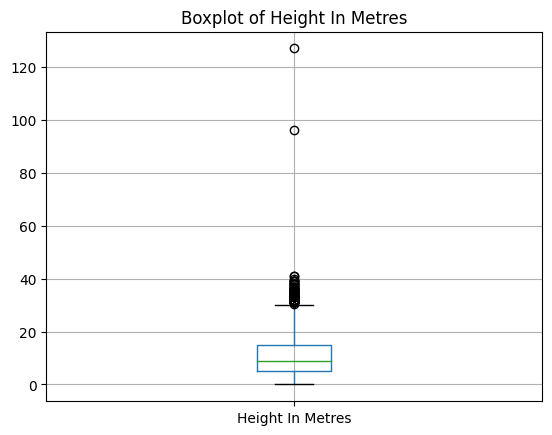

In [72]:
# Use a boxplot to find the outliers
import matplotlib.pyplot as plt


trees.boxplot(column='Height In Metres')
plt.title('Boxplot of Height In Metres')
plt.show()

In [73]:
# Function to identify outliers in a column
def identify_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

In [74]:
# Select the crazy outlier rows
height_outliers = identify_outliers(trees['Height In Metres'])
print("Outliers in 'Height In Metres' column:")
print(height_outliers)

Outliers in 'Height In Metres' column:
547      38.0
830      34.0
920      38.0
1193     36.0
1213     31.0
         ... 
22686    32.0
22701    33.0
22901    33.0
23007    35.0
23147    31.0
Name: Height In Metres, Length: 91, dtype: float64


<hr/>

### 5.2 Outliers for Spread
Now repeat the analysis for spread.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

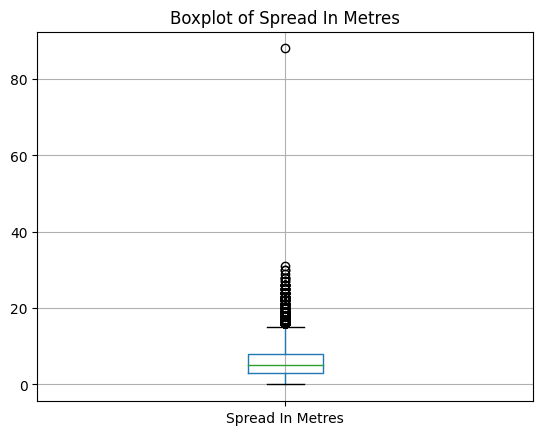

In [75]:
# Use a boxplot to find the outliers
trees.boxplot(column='Spread In Metres')
plt.title('Boxplot of Spread In Metres')
plt.show()

In [76]:
# Select the crazy outlier rows (if any)
spread_outliers = identify_outliers(trees['Spread In Metres'])
print("Outliers in 'Spread In Metres' column:")
print(spread_outliers)


Outliers in 'Spread In Metres' column:
109      17.0
227      20.0
233      18.0
239      16.0
245      22.0
         ... 
23235    18.0
23271    16.0
23279    18.0
23373    18.0
23383    16.0
Name: Spread In Metres, Length: 722, dtype: float64


<hr/>

### 5.3 Outliers for Diameter
Now repeat the analysis for diameter.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

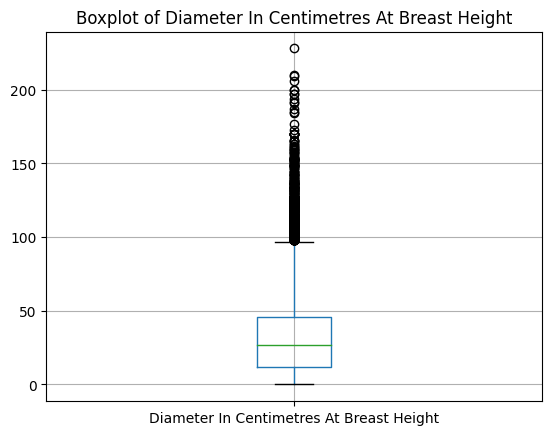

In [77]:
# Use a boxplot to find the outliers
trees.boxplot(column='Diameter In Centimetres At Breast Height')
plt.title('Boxplot of Diameter In Centimetres At Breast Height')
plt.show()

In [78]:
# Select the outlier rows (if any)
diameter_outliers = identify_outliers(trees['Diameter In Centimetres At Breast Height'])
print("Outliers in 'Diameter In Centimetres At Breast Height' column:")
print(diameter_outliers)

Outliers in 'Diameter In Centimetres At Breast Height' column:
74       119.0
155      109.0
169      106.0
227      117.0
245      114.0
         ...  
23130    101.0
23147    170.0
23183    110.0
23373     99.0
23383     99.0
Name: Diameter In Centimetres At Breast Height, Length: 572, dtype: float64


<hr/>

### 5.4 Observations

**Outliers for Height**:

Outliers were identified with heights ranging from 30 to 38 meters.
Assumption: Heights exceeding 30 meters are uncommon in urban tree populations, suggesting potential data anomalies or exceptional tree specimens.

**Outliers for Spread:**

Outliers ranged from 16 to 22 meters in spread.
Assumption: Tree spreads surpassing 16 meters are atypical in urban settings, indicating possible data inaccuracies or unique tree species.

**Outliers for Diameter:**

Detected outliers spanned from 98 to 170 centimeters in diameter.
Assumption: Breast-height diameters exceeding 98 centimeters are unusual for urban trees, implying potential errors in data recording or presence of extraordinary tree specimens.


These assumptions are based on general observations of tree dimensions in urban environments and may vary depending on specific tree species and environmental conditions.


ENTER MARKDOWN HERE

<hr/>

## Task 6: Identify Duplicates in the Trees Dataset
Sometimes data has duplicate entries.  This is another sign of data quality issues!

### 6.1 Find Duplicate Rows

In our dataset the `Identifier` column should be unique.  Find out if it is!  We've already used a function that can count how many times each value in a column exists.  Use is to see if we have duplicates in the trees Dataframe.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [79]:
# Check if there are any duplicates
duplicate_mask = trees.duplicated(subset=['Identifier'], keep=False)
duplicate_rows = trees[duplicate_mask]

# Check if there are any duplicates
if not duplicate_rows.empty:
    print("Duplicates found.")
else:
    print("No duplicates found.")

Duplicates found.


Now see if you can select the rows from trees DataFrame that are duplicates.  You will need to use the output from the cell above and use it to filter the trees dataframe.

In [80]:
# Select the rows that are duplicated
if not duplicate_rows.empty:
    duplicate_identifiers = duplicate_rows['Identifier']
    duplicate_entries = trees[trees['Identifier'].isin(duplicate_identifiers)]
    print("Rows containing duplicates:")
    print(duplicate_entries)
else:
    print("No duplicates found.")

Rows containing duplicates:
      Identifier  Number Of Trees         Site Name Contract Area  \
1219    00060088              1.0  FREDERICK STREET      Highways   
4388    00032549              1.0    NARCISSUS ROAD      Highways   
5491    00000999              1.0       ALMA STREET      Highways   
6111    00032549              1.0    NARCISSUS ROAD      Highways   
7027    00022744              1.0          YORK WAY      Highways   
9186    00022744              1.0          YORK WAY      Highways   
9482    00022674              1.0     WOODSOME ROAD      Highways   
10972   00060088              1.0  FREDERICK STREET      Highways   
13098   00000999              1.0       ALMA STREET      Highways   
13628   00022674              1.0     WOODSOME ROAD      Highways   
15393   00060087              1.0     ARGYLE SQUARE      Highways   
15653   00060087              1.0     ARGYLE SQUARE      Highways   

                                         Scientific Name Inspection Date  

<hr/>

### 6.2 Observations

Observations about duplicates in the trees dataset:

1. There are several rows with duplicate 'Identifier' values, indicating that there are multiple entries with the same identifier in the dataset.

2. The duplicate entries have identical values across most columns, suggesting that these are true duplicates.

3. Duplicate entries can lead to incorrect analysis and interpretation of the data if not handled properly.

4. It's important to identify and remove duplicate entries to ensure data integrity and accuracy in analysis.


<hr/>

## Task 7: Identify Geolocation Issues
The geographic coordinates (Easting and Northing) can be used to plot the trees on a map.  We can use this approach to see if there are any unusual tree locations!

We will make a copy of the original trees dataset and remove any rows that have a missing easting or northing as these can't be plotted on the map.

We can copy the DataFrame using:

- [pandas.DataFrame.copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)

We can use the DataFrame filtering technique we saw before to remove the missing values.  E.g. the following code filters out rows where the value for 'mycolumn' is 100:

    mask = df['mycolumn'] != 100
    df = df[mask]

You can also create masks using a function, e.g. this creates a mask which excludes nulls:

    mask = df['mycolumn'].isnull()

We can use this function to plot the trees on a map. Set x to "Easting" and y to "Northing" and set a figsize parameter to (6, 6) to get a square aspect ratio:

- [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html)




### 7.1 Remove Trees with Missing Geo-coordinates
Check if there are any rows with null or 0 geo-coordinates.  If there are, remove them as we can't plot these.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [81]:
# Make a copy of the trees
geotrees = trees.copy()

In [82]:
# Remove null Eastings
geotrees = geotrees[geotrees['Easting'].notnull()]

In [83]:
# Remove 0 Eastings.
geotrees = geotrees[geotrees['Easting'] != 0]

In [84]:
# Remove null Northings
geotrees = geotrees[geotrees['Northing'].notnull()]

In [85]:
# Remove 0 Northings.
geotrees = geotrees[geotrees['Northing'] != 0]

In [86]:
# Confirm how many rows we have
print("Number of rows after removing trees with missing or zero geo-coordinates:", len(geotrees))

Number of rows after removing trees with missing or zero geo-coordinates: 23388


<hr/>

### 7.2 Plot Map of Trees
Now make the plot.  Do a scatter plot of Northing vs Easting. You should obtain an outline of the map of Camden. Compare that outline with a real map of Camden (use good old google maps!). You’ll be able to spot the trees that should not be in that dataset from there!

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cell
    </font></div>

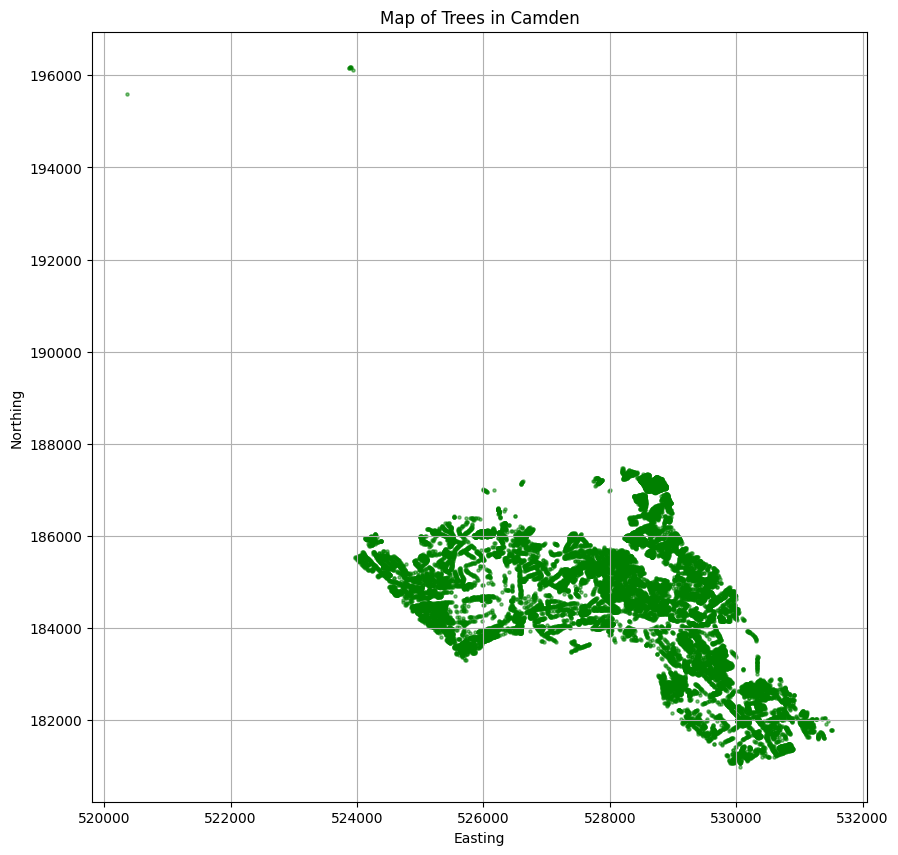

In [87]:
# Plot the trees on a map
plt.figure(figsize=(10, 10))
plt.scatter(geotrees['Easting'], geotrees['Northing'], s=5, c='green', alpha=0.5)
plt.title('Map of Trees in Camden')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.grid(True)
plt.show()

#remove outliers

### 7.3 Find Trees Outside Camden
From the scatter plot, you should be able to determine how to select the rows from the trees data set containing the offending trees (using the Easting and Northing values)

Select the rows containing trees outside of Camden.  Use the filter technique again.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [88]:
# Select the outlier rows
outlier_rows = geotrees[geotrees['Northing'] > 194000]

In [89]:
# Confirm how many rows we have
print("Number of rows containing trees outside of Camden:", len(outlier_rows))

Number of rows containing trees outside of Camden: 8


<hr/>

### 7.4 Observations

1. After removing trees with missing or zero geo-coordinates, we obtained a dataset containing 23,388 rows, indicating that a significant number of trees had valid geo-coordinates.

2. The scatter plot of Northing vs Easting created an outline of the map of Camden. Comparing this outline with a real map of Camden, we can observe that the majority of the trees are indeed within the boundaries of Camden, aligning well with the expected geographical distribution.

3. However, we identified 8 trees that are located outside of Camden based on their geo-coordinates. These trees are outliers and might indicate data entry errors or inaccuracies in the dataset.

4. Further investigation is needed to understand why these trees are located outside of Camden. It could be due to errors in geo-location data entry, mislabeling of locations, or genuine outliers.

5. Identifying and addressing these outliers is important for maintaining the integrity and accuracy of the dataset, especially for tasks such as urban planning and environmental management in the Camden area.

<hr/>

## Task 8: Identify Unmatched Data
We have multiple datasets that will need to be joined together to produce the analyses required by the Camden Parks and Open Spaces team.  The data will need to be joined in the following way:

- Use the `Identifier` column in the trees dataset to match to the `Identifier` column in the environmental data set (so we can bring in the environmental data for each tree)
- Use the `Scientific Name` column in the trees dataset to match to the `Scientific Name` column in the common names data set (so we can look up the `Common Name`)

There may be mismatches in the data.  Of particular concern we want to check

- That every tree in the trees dataset has matching environmental data in the environmental data set
- That every environmental row in the environmental dataset has matching tree data in the tree data set
- That every scientific name in the trees dataset has a matching common name in the common names data set

We aren't too concerned about the reverse of the last scenario (if we have extra names in the common names dataset that aren't in the trees data set).  We don't expect Camden to have a specimen of every tree that exists!  

There are a few ways this can be done, but one technique is to use the `isin` function to check if some column in one dataframe contains values that are in another column in another dataframe.  This creates a mask containing rows that match between the two dataframes:

    mask = df1['column_name1'].isin(df2['column_name2'])
    
To select the non-matching rows, we can use Python's bitwise not operator ~:

    mask = ~df1['column_name1'].isin(df2['column_name2'])
    
As we have seen before, the mask can be used to select that subset of rows back from the original dataframe.

### 8.1 Find Trees that Don't have Matching Environmental Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [90]:
# Find trees that don't have matching environmental data
unmatched_trees = trees[~trees['Identifier'].isin(environmental['Identifier'])]

In [91]:
# Confirm how many rows we have
print("Number of trees without matching environmental data:", len(unmatched_trees))

Number of trees without matching environmental data: 23


In [92]:
unmatched_trees.shape

(23, 17)

### 8.2 Find Environmental Data that Doesn't have Matching Tree Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [93]:
# Find environmental data that doesn't have matching tree data
unmatched_environmental = environmental[~environmental['Identifier'].isin(trees['Identifier'])]

In [94]:
# Confirm how many rows we have
print("Number of environmental data without matching tree data:", len(unmatched_environmental))

Number of environmental data without matching tree data: 0


### 8.3 Find Trees that Don't have Matching Common Names Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [95]:
# Find trees with scientific names that don't have matching common names data
unmatched_trees_common_names = trees[~trees['Scientific Name'].isin(names['Scientific Name'])]

In [96]:
# Confirm how many rows we have
print("Number of trees without matching common names data:", len(unmatched_trees_common_names))

Number of trees without matching common names data: 76


<hr/>

### 8.4 Observations

1. There are 23 trees in the trees dataset that don't have matching environmental data in the environmental dataset. These trees may have missing or incorrect identifiers in the environmental dataset, or they may not have been included in the environmental data collection process.

2. There are no rows in the environmental dataset without matching tree data in the trees dataset. This indicates that all environmental data entries are associated with a tree in the trees dataset.

3. There are 76 trees in the trees dataset that don't have matching common names data in the common names dataset. This could be due to differences in naming conventions between the two datasets, misspellings, or missing entries in the common names dataset.

4. Addressing unmatched data issues is crucial for ensuring data integrity and accuracy in analyses. It may require further investigation into data collection processes, data entry errors, or discrepancies between datasets. Resolving these issues will enhance the reliability of analyses and insights derived from the data.


<hr/>

# END OF NOTEBOOK